<center><h1 style="background-color:powderblue;">
<font size="6"
          face="verdana"
          color="darkblue"> 
            Python Weekend
</font> 

</h1>
<br>
<font size="5"
          face="verdana"
          color="#c2bf29"> 
            Análisis Exploratorio de Datos
</font> 

![](https://www.python.org/static/opengraph-icon-200x200.png)

</center>





- Autor: [Katherine Morales](https://www.linkedin.com/in/katherine-morales-7194a3108/) 
 
- contacto:  <katherine.morales_quinga@telecom-sudparis.eu>
- GitHub: [katymq](https://github.com/katymq)



<img src="https://raw.githubusercontent.com/steph1793/used_car_price_prediction/master/img/cars.png" width="1000" align="center"/>

# 1. Introducción


## 1.1 Descripción de los datos

Ebay-Kleinanzeigen es la versión alemana de la plataforma multinacional de comercio electrónico E-bay que facilita las ventas de consumidor a consumidor o de empresa a empresa a través de su sitio web.
Más de 370.000 coches usados raspados con Scrapy de Ebay-Kleinanzeigen. El conjunto de datos fue originalmente raspado y subido a [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data).

El contenido de los datos estaba originalmente en idioma alemán.

Nuestro conjunto de datos contiene 20 columnas (incluyendo la variable a predecir), la mayoría de las cuales se almacenan como cadenas. Hay unas pocas columnas con valores nulos, pero ninguna columna tiene más de ~20% de valores nulos. Hay algunas columnas que contienen fechas almacenadas como cadenas.

* `3 date type`
* `7 int type`
* `10 string type`

<h3> Training, validation, test subsets</h3>

El conjunto de datos propuesto se ha dividido en subconjuntos de "entrenamiento" y "validación" para entrenar el modelo. Las formas son:

* `training: (240 000, 20)`
* `validation: (60 000, 20)`

Entonces su modelo será probado en un conjunto de datos de prueba:

* `test: (71 528, 20)`

##  1.2 Variables

El conjunto de datos del tren consta de 20 campos siguientes:
<ol>
    <li value="0">  <b>dateCrawled</b> - Cuando este anuncio fue arrastrado por primera vez. Todos los valores de campo son tomados de esta fecha.
    <li>  <b>name</b> - Nombre del carro
    <li>  <b>seller</b> - Ya sea que el vendedor sea privado o un traficante.
    <li>  <b>offerType</b> - Tipo de lista
    <li>  <b><i>PRICE</i></b> - El precio (en euros) del anuncio de venta del coche. (para ser pronosticado)
    <li>  <b>abtest</b> - Si la lista está incluida en una prueba A/B
    <li>  <b>vehicleType</b> - El tipo de vehículo.
    <li>  <b>yearOfRegistration</b> - TEl año en que se registró el coche por primera vez (el año en que se le ha atribuido un número de imitación).
    <li>  <b>gearbox</b> - El tipo de transmisión.
    <li>  <b>powerPS</b> - La potencia del coche en PS (Pferdestärke - fuerza de los caballos en alemán).
    <li> <b>model</b> - El nombre del modelo de coche.
    <li> <b>kilometer</b> - Cuántos kilómetros ha recorrido el coche.
    <li> <b>monthOfRegistration</b> - El mes en el que se registró el coche por primera vez.
    <li> <b>fuelType</b> - Qué tipo de combustible usa el coche.
    <li> <b>brand</b> - La marca del coche.
    <li> <b>notRepairedDamage</b> - Si el coche tiene un daño que aún no ha sido reparado.
    <li> <b>dateCreated</b> - La fecha en la que se creó el anuncio en Ebay.
    <li> <b>nrOfPictures</b> - El número de fotos en el anuncio.
    <li> <b>postalCode</b> - Tel código postal para la ubicación del vehículo.
    <li> <b>lastSeenOnline</b> - Cuando el rastreador vio este anuncio por última vez en línea.
</ol>

Los campos LastSeen y DateCreated podrían usarse para estimar cuánto tiempo estará un coche al menos en línea antes de que se venda

## 1.3 Required packages, imports and data loading

* `pandas`
* `numpy`
* `scipy`
* `scikit-learn`
* `matplotlob`
* `seaborn`
* `imp`
* `jupyter notebook`
* `lightgbm`
* `folium`
* `statsmodels`

In [ ]:
%matplotlib inline
import folium
from urllib.request import urlopen
import json
import imp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import warnings
import os
import matplotlib as mpl
mpl.style.use('seaborn') #Background
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
colab = False
if colab:
  path_train = "https://github.com/katymq/used_car_price_prediction-1/data/train.csv.zip"
  path_test = "https://github.com/katymq/used_car_price_prediction-1/data/test.csv.zip"
else:
  path_train = "data/train.csv.zip"
  path_test = "data/test.csv.zip"

train = pd.read_csv(path_train, encoding = "ISO-8859-1", low_memory=False, delimiter=',')
test = pd.read_csv(path_test, encoding = "ISO-8859-1", low_memory=False, delimiter=',')

y_train = train['price']
X_train = train.drop('price',1)

# 2. Análisis exploratorio de datos


## 2.1 Descripción general de los datos

In [ ]:
print('Number of observations of train data: %d'%X_train.shape[0])
X_train.head()

Number of observations of train data: 240000


,dateCrawled,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-15 18:38:35,Audi_A6_Avant_2.7_TDI,privat,Angebot,control,kombi,2006,manuell,180,a6,150000,4,diesel,audi,NaN,2016-03-15 00:00:00,0,77963,2016-03-17 14:16:01
1,2016-03-12 17:43:15,CitroÃ«n_C5_Tourer_HDi_140_FAP_Tendance,privat,Angebot,test,kombi,2009,manuell,140,c5,150000,1,diesel,citroen,nein,2016-03-12 00:00:00,0,35447,2016-03-16 21:18:25
2,2016-03-23 01:02:36,Opel_Vectra_B_1.8_16V_LPG_Gas_Autogas,privat,Angebot,test,limousine,1998,manuell,115,vectra,150000,5,benzin,opel,nein,2016-03-23 00:00:00,0,34576,2016-04-05 02:16:17
3,2016-03-23 16:57:09,Audi_A3_2.0_TDI_Sportback_DPF_S_tronic,privat,Angebot,test,kombi,2012,NaN,0,a3,30000,3,diesel,audi,nein,2016-03-23 00:00:00,0,18439,2016-03-31 04:15:52
4,2016-03-11 09:53:39,Seat_Altea,privat,Angebot,control,NaN,2017,NaN,102,altea,150000,0,benzin,seat,NaN,2016-03-11 00:00:00,0,80686,2016-03-15 19:46:17


Las variables en los datos y su tipo

In [ ]:
X_train.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

Una descripción de las variables "numéricas" de los datos.

In [ ]:
X_train.describe()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,240000.000000,240000.000000,240000.000000,240000.000000,240000.0,240000.000000
mean,2004.670488,115.727642,125671.937500,5.733475,0.0,50843.261937
std,95.523918,201.143841,40052.890513,3.712346,0.0,25799.874429
min,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1999.000000,69.000000,125000.000000,3.000000,0.0,30519.000000
50%,2003.000000,105.000000,150000.000000,6.000000,0.0,49632.000000
75%,2008.000000,150.000000,150000.000000,9.000000,0.0,71634.000000
max,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**Observaciones**:
- mes de registro: no es una variable numérica.
- nrOfPictures: sólo tiene un valor -cero- (0), entonces no es una variable útil.
- yearOfRegistration: tiene un valor máximo igual a 9999, esto es obviamente un error.
- powerPS: su valor máximo es 20 000, lo que no es correcto según la [lista de carros por horsepower.](https://en.wikipedia.org/wiki/List_of_production_cars_by_horsepower)

*offertType* es una variable categórica pero tiene una categoría que representa más del 99 % de las observaciones, por lo tanto no la usaremos. Además, la variable *abtest* parece ser interna de E-Bay, probablemente el control o los grupos de prueba para algunas pruebas internas A/B, entonces la dejaremos de lado.

In [ ]:
print(' Variable: Offer type')
print(X_train['offerType'].value_counts(normalize=True).mul(100))
print('\n Variable: Seller')
print(X_train['seller'].value_counts(normalize=True).mul(100))
print('\n Variable:  Abtest')
print(X_train['abtest'].value_counts(normalize=True).mul(100))

 Variable: Offer type
Angebot    99.997083
Gesuch      0.002917
Name: offerType, dtype: float64

 Variable: Seller
privat        99.999583
gewerblich     0.000417
Name: seller, dtype: float64

 Variable:  Abtest
test       51.871667
control    48.128333
Name: abtest, dtype: float64



Además, las variables a las que les faltan valores, en orden creciente, son:
  - caja de cambios $5.48\%$
  - modelo $5.51\%$
  - fuelType $9.03\%$
  - vehículoTipo $10.24\%$
  - no ReparadoDaño $19.46\%$

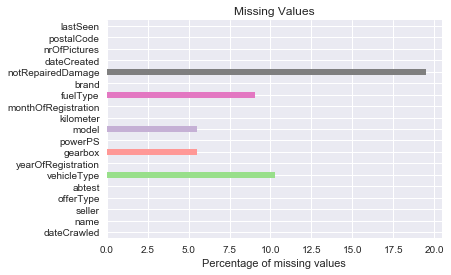

In [ ]:
col = [i for i in get_cmap('tab20').colors]
missing = X_train.isna().sum().mul(100/X_train.shape[0]).plot(kind='barh',title='Missing Values',color=col)
missing.set_xlabel('Percentage of missing values')
plt.show()

**Eventuales valores atípicos**<br>
Al analizar los datos, nos encontramos con algunos valores irrelevantes (el valor máximo está en 2 mil millones de euros y hay algunos coches que se venden a 0 euros). Los valores 0 pueden explicarse por el hecho de que algunos vendedores no están dispuestos a poner su estimación del precio del coche, sino que prefieren negociar directamente con los clientes. Hay que prestar atención a esos valores. <br><br>
Para algunos de nuestros análisis, pusimos en marcha un método ingenuo en el que dejamos de lado esos valores. Basamos este método ingenuo en los filtros del sitio oficial de [E-bay](https://www.ebay.fr/b/Automobiles/9801/bn_16573852?LH_BIN=1&rt=nc).<br><br>

  Para una solución más sofisticada, podemos hacer un estudio sobre los precios de las diferentes marcas y tipos de coches, y excluir los coches que están demasiado alejados de los límites.

In [ ]:
def remove_outliers(X):
    return X[(X["price"]<1e6 & X["price"]>100)]

## 2.2 Explorando las variables del vehículo

Variables categóricas:

- **Modelo:** esta variable contiene 251 valores diferentes. Mostramos los 10 primeros.


- **Marca:** tiene muchos niveles (40) por lo que sólo mostraremos los 10 primeros.

- **Tipo de vehículo:** tiene 8 niveles e indica el estilo de carrocería del coche.

 Podemos ver que el 30% de los autos son **limusinas** y menos del 5% son **andere**.

- **Tipo de combustible:** hay 7 categorías pero sólo dos son las que representan más del 90% de los datos.


- **Tipo de transmisión:**
en esta variable tenemos 2 etiquetas, manual y automática.

- **Daño no reparado:** sólo puede tomar dos valores: "sí" o "no", se refiere a un potencial daño no reparado en el vehículo que se vende.

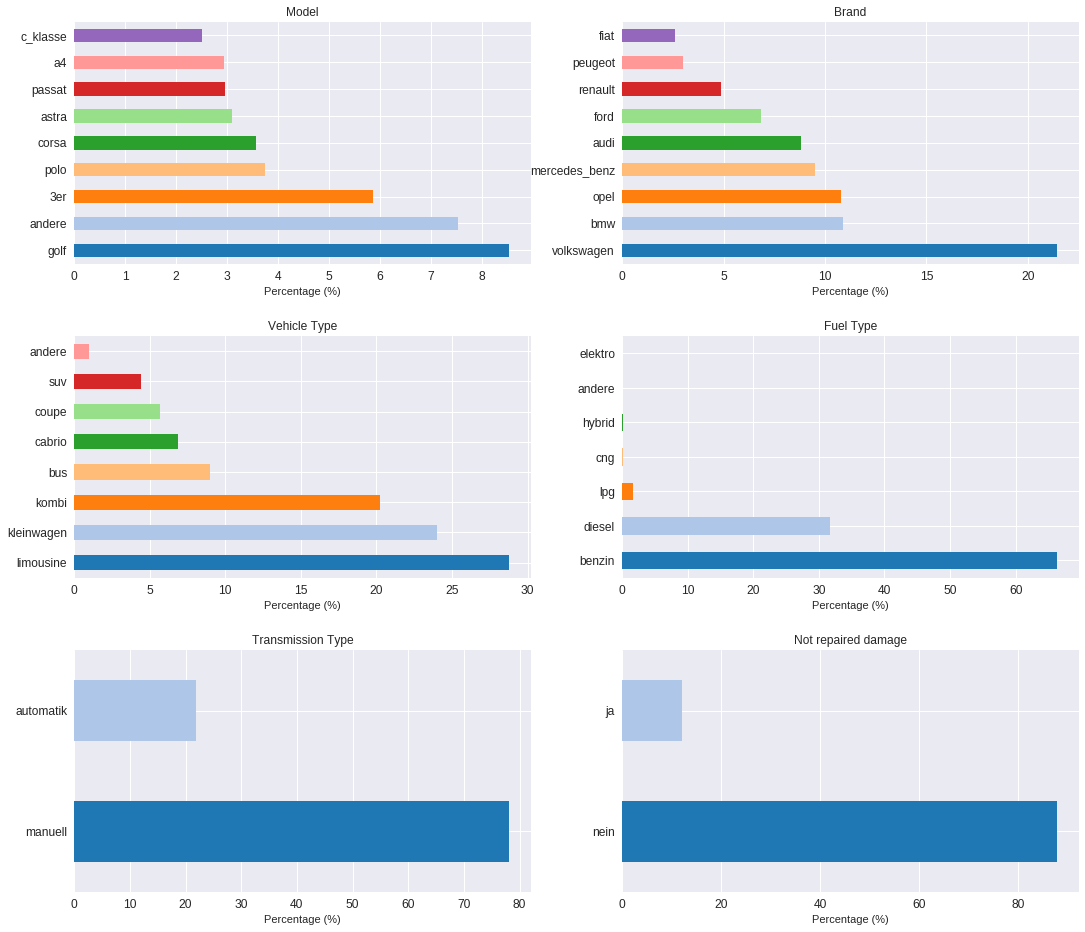

In [ ]:
figs = (18,16)
plt.subplots_adjust(hspace = 0.3)#bottom = 1.5)
xlabel = 'Percentage (%)'
plt.subplot(3,2,1)
model = X_train['model'].value_counts(normalize=True).sort_values(ascending=False)[0:9].mul(100).plot(kind='barh', title='Model',
                                         figsize=figs,fontsize=12, color=col)
model.set_xlabel(xlabel)
plt.subplot(3,2,2)
brand = X_train['brand'].value_counts(normalize=True).sort_values(ascending=False)[0:9].mul(100).plot(kind='barh', title='Brand',
                                         figsize=figs, fontsize=12,color = col)
brand.set_xlabel(xlabel)
plt.subplot(3,2,3)
vehicle = X_train['vehicleType'].value_counts(normalize=True).mul(100).plot(kind='barh', title='Vehicle Type',
                                         figsize=figs,fontsize=12, color=col)
vehicle.set_xlabel(xlabel)
plt.subplot(3,2,4)
fuel = X_train['fuelType'].value_counts(normalize=True).mul(100).plot(kind='barh', title='Fuel Type',
                                         figsize=figs,fontsize=12, color=col)
fuel.set_xlabel(xlabel)
plt.subplot(3,2,5)
transm = X_train['gearbox'].value_counts(normalize=True).mul(100).plot(kind='barh', title='Transmission Type',
                                         figsize=figs,fontsize=12, color=col)
transm.set_xlabel(xlabel)
plt.subplot(3,2,6)
damage = X_train['notRepairedDamage'].value_counts(normalize=True).mul(100).plot(kind='barh', title='Not repaired damage',
                                         figsize=figs,fontsize=12, color=col)
damage.set_xlabel(xlabel)
plt.show()

Variables numéricas:
- **Potencia del motor:** podemos observar que hay alrededor de 10 %$ de valores iguales a cero, lo que no es posible en la realidad.
- **Kilómetro:** es una variable importante porque el kilometraje es una de las piezas de información más importantes cuando se trata de coches usados.

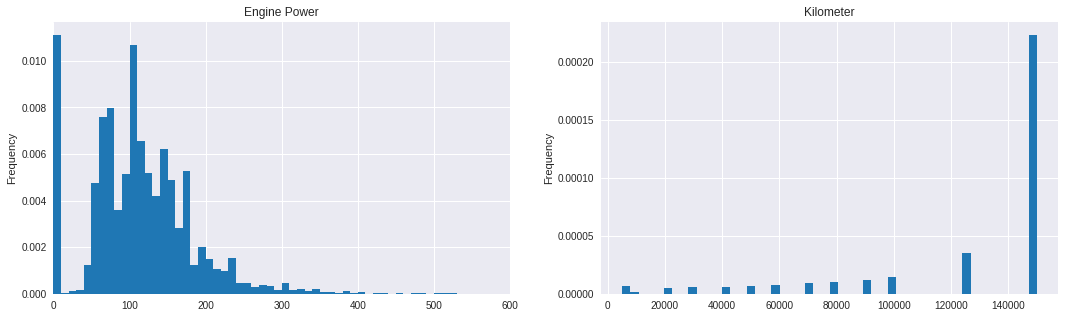

In [ ]:
figs = (18,5)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(1,2,1)
pw = X_train['powerPS'].plot(kind='hist', bins=2000,normed = True, color = col, title = 'Engine Power', label='', figsize=figs)
pw.set_xlim((0,600))
plt.subplot(1,2,2)
km = X_train['kilometer'].plot(kind='hist', bins=50,normed = True, color = col, title = 'Kilometer', label='', figsize=figs)
plt.show()

##  2.3 Explorando las variables de fecha

- **yearOfRegistration:** 
Visualizamos los datos desde 1960 hasta el presente año (2019).

 En el gráfico, observamos tres períodos diferentes, donde hubo más matriculaciones de coches, en comparación con los años anteriores y posteriores. Estos períodos son:

 - 1999 - 2001
 - 2005 - 2006
 - 2016 - 2018

 Para explicar estos datos con más detalle, es necesario investigar más sobre la historia de la industria alemana.
<br>
Nota extra: La crisis de la industria automotriz de 2008-2010 fue parte de la crisis financiera de 2007-2008 y la Gran Recesión resultante.

- **monthOfRegistration:**
Esta es una variable categórica. Enero, marzo y junio son los meses más fuertes para el registro de vehículos.

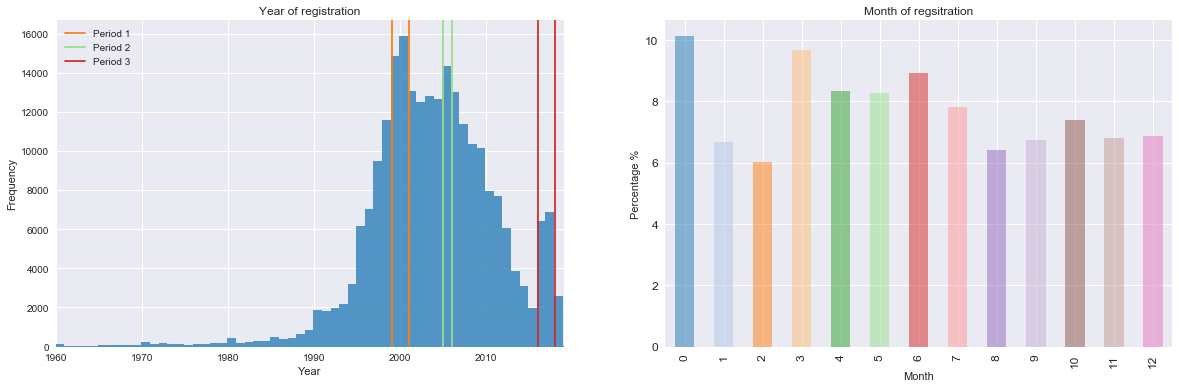

In [ ]:
plt.subplot(1,2,1)
yor = X_train['yearOfRegistration'].plot(kind='hist', alpha=0.75, bins=9000,title = 'Year of registration', color = col,label='',  figsize=(20,6))
yor.set_xlim((1960,2019))
yor.set_xlabel('Year')
yor.axvline(x=1999,color = col[2], label='Period 1')
yor.axvline(x=2001,color = col[2])
yor.axvline(x=2005,color = col[5], label='Period 2')
yor.axvline(x=2006,color = col[5])
yor.axvline(x=2016,color = col[6], label='Period 3')
yor.axvline(x=2018,color = col[6])
yor.legend()
plt.subplot(1,2,2)
mor = X_train['monthOfRegistration'].value_counts(normalize=True).mul(100).sort_index().plot(kind='bar', alpha=0.5,
                                         title='Month of regsitration',
                                         fontsize=12, color=col, figsize=(20,6))
mor.set_xlabel('Month')
mor.set_ylabel('Percentage %')
plt.show()

##  2.4 Explorando las relaciones con la variable del precio. 

En esta sección, examinaremos las variables con respecto a la variable del precio, que es la variable a predecir.


- **Price :** 
Del resumen, podemos ver que algunos precios suben a más de  $2 \times10^{9}$, y unos 50 coches tienen un precio superior a 1 millón de dólares (eventuales valores atípicos).  

In [ ]:
y_train.describe()

count    2.400000e+05
mean     2.074380e+04
std      4.439585e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.190000e+03
max      2.147484e+09
Name: price, dtype: float64

Ahora, mostramos la correlación entre las variables numéricas (*powerPS, kilometer and  yearOfRegistration*), and  the log of *price*.

In [ ]:
train['log_price'] = train['price'].apply(lambda x: np.nan if x == 0  else np.log10(x))
corr = train[['log_price', 'powerPS', 'kilometer','yearOfRegistration']].corr()
corr.style.background_gradient(cmap='tab20').set_precision(2)

,log_price,powerPS,kilometer,yearOfRegistration
log_price,1.00,0.18,-0.33,0.03
powerPS,0.18,1.00,-0.01,-0.00
kilometer,-0.33,-0.01,1.00,-0.06
yearOfRegistration,0.03,-0.00,-0.06,1.00


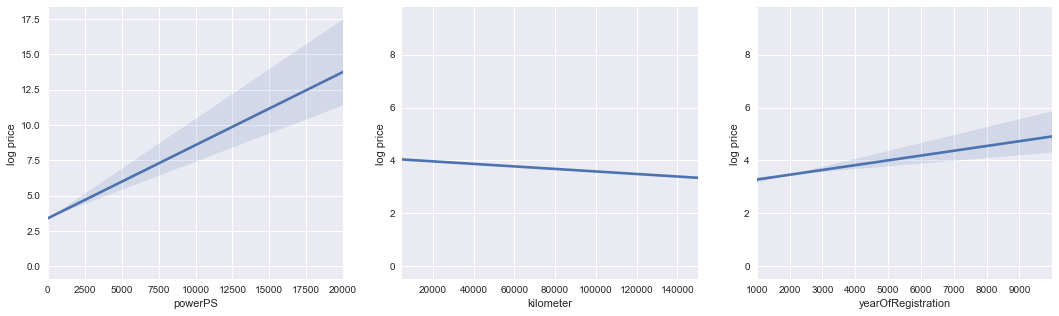

In [ ]:
# Plotting log-price with numerical variables
# Numerical variables 
num_cols = ['powerPS', 'kilometer','yearOfRegistration']
iterator_ax = 0
for i, colm in enumerate(num_cols):
  try:
      current_ax = next(iterator_ax)
  except:
      fig, ax = plt.subplots(1, 3, figsize = (18, 5))
      iterator_ax = iter(ax)
      current_ax = next(iterator_ax)
  sns.regplot(x = colm, y = 'log_price', data = train, scatter_kws = {'s':0}, ax = current_ax)
  current_ax.set(ylabel = "log price ")
plt.show()


Con esos gráficos se puede observar la correlación del log_precio con las variables "PowerPS", "kilómeter" y el año de registro, con la incertidumbre de la correlación. Cuanto más se ha utilizado el coche (mayor número de kilómetros), menor es el precio. 

Variables Categoricas: **Model, Brand, Vehicle Type, Fuel Type, Transmission Type, Not repaired damage**. 



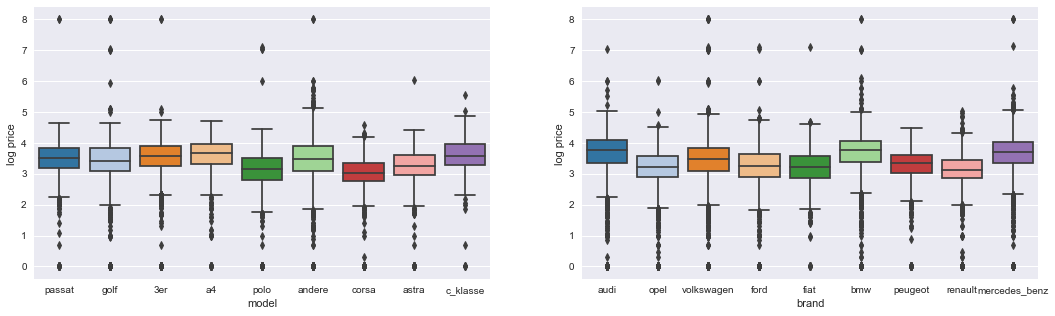

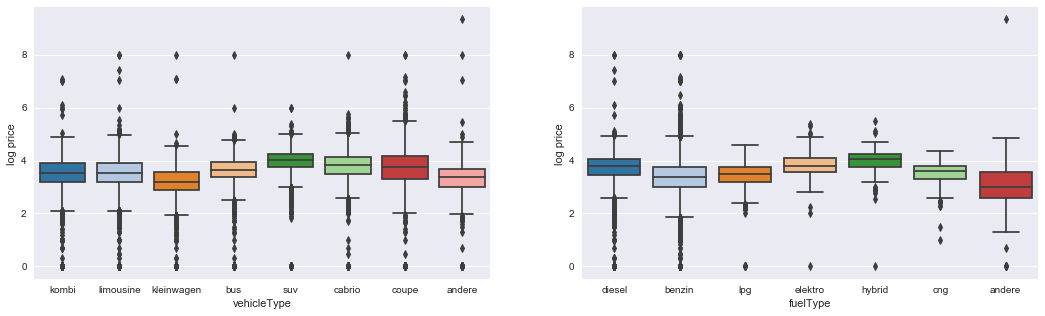

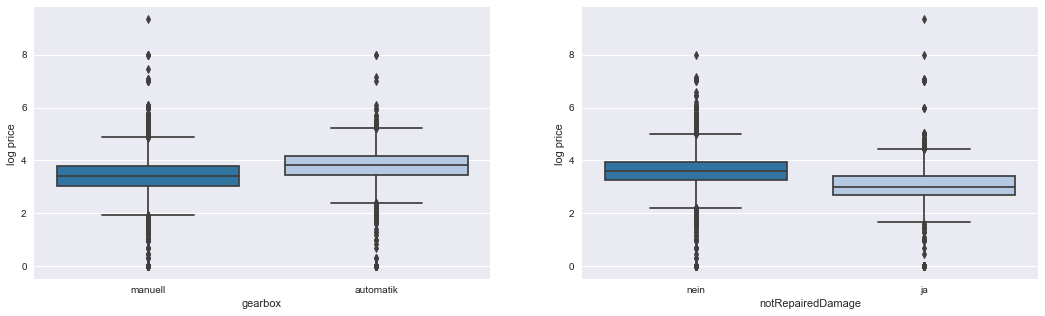

In [ ]:
# Plotting log-price with categorical variables
# Categorical variables 
cat_cols = ['model', 'brand','vehicleType', 'fuelType','gearbox','notRepairedDamage']
#Top 10 variable model 
model = ['golf','andere','3er','polo','corsa','astra','passat','a4','c_klasse']
#Top 10 variable brand
brand = ['volkswagen','bmw','opel','mercedes_benz','audi','ford','renault','peugeot','fiat']
iterator_ax = 0
for i, colm in enumerate(cat_cols):
  if colm == 'model':
      d = train[train[colm].isin(model)]
  elif colm == 'brand':
      d = train[train[colm].isin(brand)]
  else: 
      d = train
  try:
      current_ax = next(iterator_ax)
  except:
      fig, ax = plt.subplots(1, 2, figsize = (18, 5))
      iterator_ax = iter(ax)
      current_ax = next(iterator_ax)
  sns.boxplot(x=colm, y="log_price", data=d, ax = current_ax, palette='tab20')
  current_ax.set(ylabel = "log price ")
plt.show()

Another important information that we could observe is the duration it has taken for a car to be sold. We compute this duration in days.

In [ ]:
train["time_before_sold"] = (pd.to_datetime(train["lastSeen"]) - pd.to_datetime(train["dateCreated"]) ).dt.days

**Pairplots**

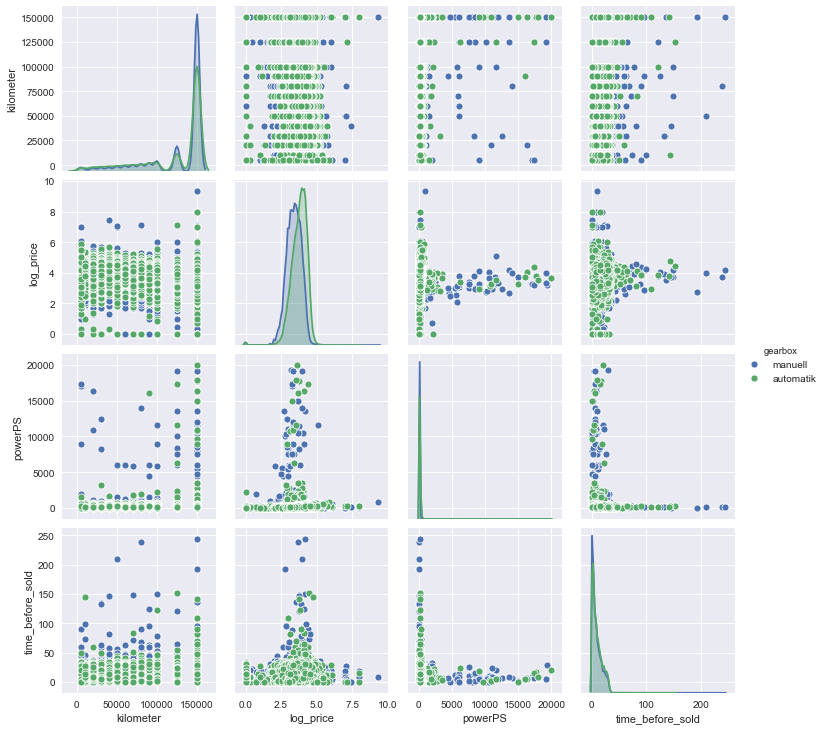

In [ ]:
g = sns.pairplot(train[["vehicleType","gearbox", "brand", "kilometer", "log_price", "powerPS", "time_before_sold"]], hue="gearbox")


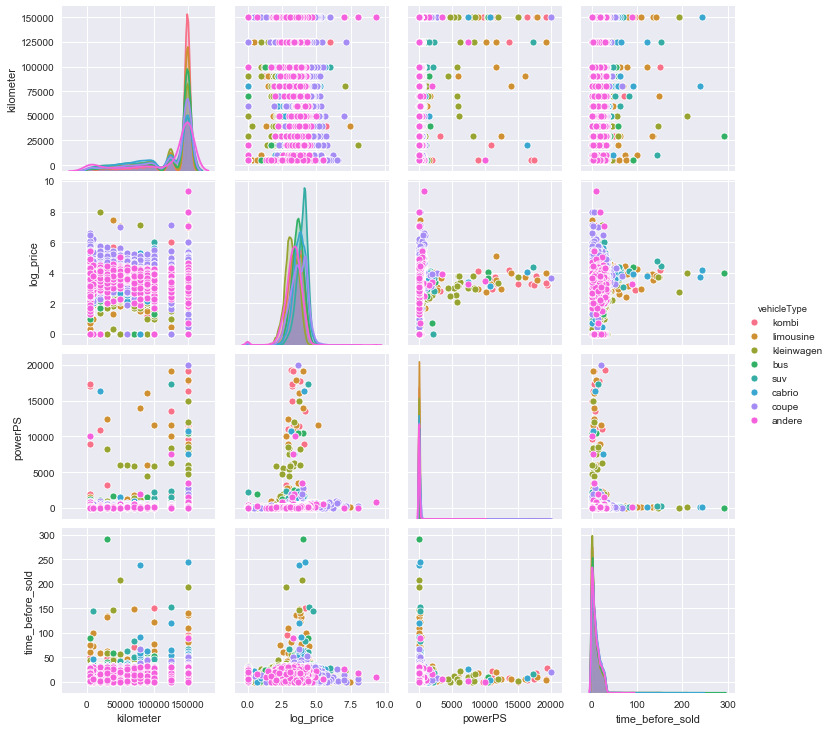

In [ ]:
g = sns.pairplot(train[["vehicleType","gearbox", "brand", "kilometer", "log_price", "powerPS", "time_before_sold"]], hue="vehicleType")


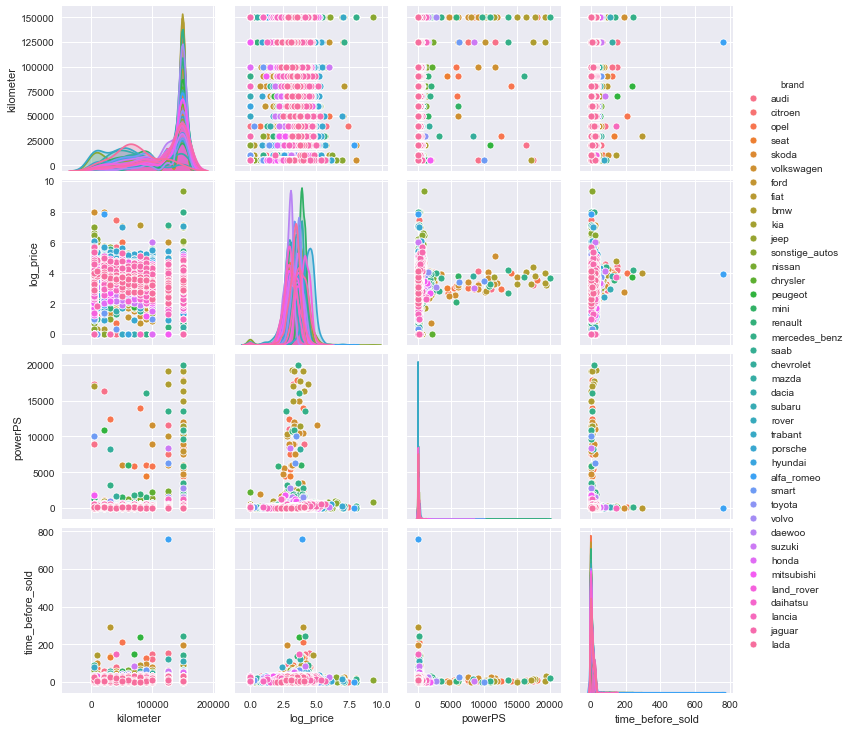

In [ ]:
g = sns.pairplot(train[["vehicleType","gearbox", "brand", "kilometer", "log_price", "powerPS", "time_before_sold"]], hue="brand")


De esas parcelas, podemos ver que el tipo de vehículo "andere" tiene generalmente un número menor de kilómetros por coche comparado con el tipo "konbi".

#  3. Preprocesamiento de datos


En esta sección, presentaremos algunos métodos de preprocesamiento de datos para nuestro caso.

In [ ]:
print(X_train.shape)
print(X_train.columns.values)

(240000, 19)
['dateCrawled' 'name' 'seller' 'offerType' 'abtest' 'vehicleType'
 'yearOfRegistration' 'gearbox' 'powerPS' 'model' 'kilometer'
 'monthOfRegistration' 'fuelType' 'brand' 'notRepairedDamage'
 'dateCreated' 'nrOfPictures' 'postalCode' 'lastSeen']


Las características que estamos usando para construir nuestro modelo: 

- dateCrawled<br>
- seller  <br>
- vehicleType <br>
- yearOfRegistration <br>
- gearbox <br>
- powerPS<br>
- model <br>
- kilometer<br>
- monthOfRegistration <br>
- fuelType <br>
- brand  <br>
- notRepairedDamage<br>
- dateCreated <br>
- nrOfPictures<br>
- postalCode <br>


In [ ]:
print(X_train['seller'].unique())
print(X_train['yearOfRegistration'].unique())
print("NB tests values : ",X_train[X_train['abtest'] == 'test']['abtest'].count())
print("NB control values : ",X_train[X_train['abtest'] == 'control']['abtest'].count())

['privat' 'gewerblich']
[1999 2009 1995 1991 2008 2001 2010 1998 2012 2005 1996 2018 1997 2014
 1990 2000 1993 2007 1992 2016 2011 1994 2004 2013 2006 2017 2002 2003
 2015 1987 1970 1979 1978 1988 1981 1986 1989 1983 1962 1964 1969 1985
 1980 1967 1966 1951 1982 1960 1968 1984 1971 1959 1975 2019 1977 1976
 1972 9999 1965 1500 1934 1973 1974 1923 1936 3000 1950 1957 1944 1910
 7000 1958 9450 1961 1956 1952 1919 1945 5000 1000 1947 1915 1925 1963
 1938 1954 1929 1955 4000 1953 1800 1937 7500 1930 1234 1931 8888 9000
 6000 5600 1940 1932 1935 1933 1688 4100 8000 5555 1939 8200 2066 1942
 1911 1946 1941 1602 6200 8500 2500 9229 1949 1948 1920 4500 2222]
NB tests values :  99446
NB control values :  92554


Primero procedemos a analizar los valores que faltan de las variables:

  - vehicleType  
  - model 
  - notRepairedDamage 
  - gearbox
  - fuelType 



Para cada muestra del conjunto de datos, con el fin de llenar los valores nan, hemos realizado sucesivas
"groupby" sobre las características que eran las más relevantes para predecir el valor perdido. Para
para llenar el valor que faltaba del tipo de combustible, era pertinente tener en cuenta la
el modelo del vehículo, la marca, etc. 

Para obtener al final del proceso una relación de valores nanométricos
lo más bajo posible y con el fin de llenar los valores nan con valores tan exactos como sea posible a la
realidad, hemos realizado la agrupación sucesiva de tal manera que primero tuvimos en cuenta todos
las características que eran relevantes para predecir el valor faltante dado, y luego quitamos
sucesivamente del grupo por las características que nos hicieron menos importantes para tomar la decisión
sobre el valor a atribuir al valor faltante, y esto hasta alcanzar una proporción de valor faltante baja
suficiente. Con este proceso, hemos obtenido proporciones de valores perdidos lo suficientemente bajas para poder utilizar
el conjunto de datos de nuestro problema de predicción y los valores atribuidos a los valores perdidos no eran
atribuidas al azar pero con criterios que parecían lo más cercanos posible a la realidad.

In [ ]:
# Fill the NaN values of the vehicleType column
# classified by order of importance chose by ourself:
list_vehicleType_depend=['powerPS', 'model', 'brand' ,'gearbox','fuelType'] 

for i in range(len(list_vehicleType_depend)-1):
  X_train['vehicleType'] = X_train['vehicleType'].fillna(X_train.groupby(list_vehicleType_depend)['vehicleType'].apply(lambda x: x.ffill().bfill()))
  list_vehicleType_depend.pop(-1)


In [ ]:
# Fill the NaN values of the model column 
# classified by order of importance chose by ourself, categorical variables:
list_model_depend= [ 'powerPS', 'brand','gearbox','vehicleType', 'fuelType'] 
for i in range(len(list_model_depend)-1):
  X_train['model'] = X_train['model'].fillna(X_train.groupby(list_model_depend)['model'].apply(lambda x: x.ffill().bfill()))
  list_model_depend.pop(-1)

In [ ]:
# Fill the NaN values of the notRepaireDamage column
# classified by order of importance chose by ourself, categorical variables:
list_notRepairedDamage_depend= ['kilometer', 'dateCreated', 'brand'] 
for i in range(len(list_notRepairedDamage_depend)-1):
  X_train['notRepairedDamage'] = X_train['notRepairedDamage'].fillna(X_train.groupby(list_notRepairedDamage_depend)['notRepairedDamage'].apply(lambda x: x.ffill().bfill()))
  list_notRepairedDamage_depend.pop(-1)


In [ ]:
# Fill the NaN values of the gearbox column
# classified by order of importance chose by ourself, categorical variables
list_gearbox_depend= ['model', 'vehicleType', 'brand', 'powerPS','dateCreated'] 
for i in range(len(list_gearbox_depend)-1):
  X_train['gearbox'] = X_train['gearbox'].fillna(X_train.groupby(list_gearbox_depend)['gearbox'].apply(lambda x: x.ffill().bfill()))
  list_gearbox_depend.pop(-1)


In [ ]:
# Fill the NaN values of the fuelType column 
# classified by order of importance chose by ourself, categorical variables
list_fuelType_depend= [ 'model', 'powerPS', 'vehicleType','brand','gearbox'] 
for i in range(len(list_fuelType_depend)-1):
  X_train['fuelType'] = X_train['fuelType'].fillna(X_train.groupby(list_fuelType_depend)['fuelType'].apply(lambda x: x.ffill().bfill()))
  list_fuelType_depend.pop(-1)

X_train.isna().mean()

dateCrawled            0.000000
name                   0.000000
seller                 0.000000
offerType              0.000000
abtest                 0.000000
vehicleType            0.020333
yearOfRegistration     0.000000
gearbox                0.009575
powerPS                0.000000
model                  0.011308
kilometer              0.000000
monthOfRegistration    0.000000
fuelType               0.005063
brand                  0.000000
notRepairedDamage      0.000075
dateCreated            0.000000
nrOfPictures           0.000000
postalCode             0.000000
lastSeen               0.000000
dtype: float64

En las siguientes líneas, proponemos algunos métodos para el preprocesamiento de los datos. Extraemos la fecha en que el coche ha sido publicado en la placa. También procesamos el código postal tomando los 2 primeros números (de forma ingenua).

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import numpy as np

numeric_transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])

def process_date(X):
    dateCreated = pd.to_datetime(X['dateCreated'], format='%Y-%m-%d')
    return np.c_[dateCreated.dt.year, dateCreated.dt.month, dateCreated.dt.day]
date_transformer = FunctionTransformer(process_date, validate=False)

def process_zipcodes(X):
    zipcode_nums = pd.to_numeric(X['postalCode'].astype(str).str[:2], errors='coerce')
    return zipcode_nums.values[:, np.newaxis]
zipcode_transformer = FunctionTransformer(process_zipcodes, validate=False)

def process_gear(X):
    gear = X['gearbox']
    di_gear = {"manuell": 1, "automatik": 2}
    gear = gear.replace(di_gear)
    return pd.to_numeric(gear).values[:, np.newaxis]
gear_transformer = FunctionTransformer(process_gear, validate=False)

def process_seller(X):
    seller = X['seller']
    di_seller = {"privat": 1, "gewerblich": 2}
    seller = seller.replace(di_seller)
    return pd.to_numeric(seller).values[:, np.newaxis]
seller_transformer = FunctionTransformer(process_seller, validate=False)

def process_car_age(X):
    yearOfRegistration = X['yearOfRegistration']
    monthOfRegistration = X['monthOfRegistration']
    dateCreated = X['dateCreated']
    year_month_day_created = process_date(X)
    carAge = X.insert(1, 'carAge', yearOfRegistration - year_month_day_created[year], True)
    return pd.to_numeric(carAge).values[:, np.newaxis]
car_age_transformer = FunctionTransformer(process_car_age, validate=False)

model_te = X_train[["model"]].dropna()
model_te = pd.concat((model_te, pd.Series(y_train)), axis=1)
model_te = model_te.rename(columns={0:"price"})
model_te = model_te.groupby("model").agg(["median"])
model_te["model_rank"] = model_te["price"]["median"].rank(ascending=False)
model_te["model_te"] = model_te.index
model_rank = pd.DataFrame({"model_te":model_te["model_te"], "model_rank":model_te["model_rank"]})


brand_te = X_train[["brand"]].dropna()
brand_te = pd.concat((brand_te, pd.Series(y_train)), axis=1)
brand_te = brand_te.rename(columns={0:"price"})
brand_te = brand_te.groupby("brand").agg(["median"])
brand_te["brand_rank"] = brand_te["price"]["median"].rank(ascending=False)
brand_te["brand_te"] = brand_te.index
brand_rank = pd.DataFrame({"brand_te":brand_te["brand_te"], "brand_rank":brand_te["brand_rank"]})


def brand_model(X): 
    brand = pd.merge(X, brand_rank, left_on="brand", right_on="brand_te", how="left")
    return brand[["brand_rank"]]
brand_transformer = FunctionTransformer(brand_model, validate=False)

def process_model(X): 
    model = pd.merge(X, model_rank, left_on="model", right_on="model_te", how="left")
    return model[["model_rank"]]
model_transformer = FunctionTransformer(process_model, validate=False)

# carAge_col = ['carAge']
seller_col = ['seller']
gear_col = ['gearbox']
num_cols = ['powerPS', 'kilometer']
zipcode_col = ['postalCode']
#kilometer_col = ['kilometer'] faire 4 groupe ? 
model_col = ['model']
brand_col = ['brand']
#date_cols = ['Fiscal_year_end_date']
drop_cols = ['dateCrawled', 'nrOfPictures', 'lastSeen']

preprocessor = ColumnTransformer(
    transformers=[
        # ('carAge', make_pipeline(car_age_transformer, SimpleImputer(strategy='median')), carAge_col),
        ('seller', make_pipeline(seller_transformer, SimpleImputer(strategy='median')), seller_col),
        ('gear', make_pipeline(gear_transformer, SimpleImputer(strategy='median')), gear_col),
        ('zipcode', make_pipeline(zipcode_transformer, SimpleImputer(strategy='median')), zipcode_col),
        ('num', numeric_transformer, num_cols),
        ('model_te', make_pipeline(model_transformer, SimpleImputer(strategy='median')), model_col),
        ('brand_te', make_pipeline(brand_transformer, SimpleImputer(strategy='median')), brand_col),
        #('date', make_pipeline(date_transformer, SimpleImputer(strategy='median')), date_cols),
        ('drop cols', 'drop', drop_cols),
        ])

X_array = preprocessor.fit_transform(X_train)
X_array

array([[1.000e+00, 1.000e+00, 7.700e+01, ..., 1.500e+05, 9.600e+01,
        6.500e+00],
       [1.000e+00, 1.000e+00, 3.500e+01, ..., 1.500e+05, 1.610e+02,
        2.200e+01],
       [1.000e+00, 1.000e+00, 3.400e+01, ..., 1.500e+05, 2.220e+02,
        3.400e+01],
       ...,
       [1.000e+00, 1.000e+00, 2.400e+01, ..., 1.500e+05, 1.500e+02,
        1.750e+01],
       [1.000e+00, 1.000e+00, 4.700e+01, ..., 1.250e+05, 1.705e+02,
        1.750e+01],
       [1.000e+00, 1.000e+00, 1.200e+01, ..., 1.500e+05, 1.020e+02,
        1.750e+01]])